# Récupérer les données Velib et les visualiser

La société JCDecaux met à disoposition les données Velib pour toutes les villes dont il gère le service (Paris, Besançon, Nantes, Lyon, ...). Les données sont accessibles en temps réel via une API assez simple : [JCDecaux Developer](https://developer.jcdecaux.com/#/home). Le module [pyensae](http://www.xavierdupre.fr/app/pyensae/helpsphinx/index.html) inclut désormais la classe [DataVelibCollect](http://www.xavierdupre.fr/app/pyensae/helpsphinx/pyensae/datasource/data_velib.html?highlight=velib#datasource.data_velib.DataVelibCollect) qui permet de récupérer ces données et d'effectuer quelques traitements simples.

Tout d'abord, il est nécessaire d'obtenir une clé en vous enregistrant sur le site de JCDecaux : [Votre compte développeur](https://developer.jcdecaux.com/#/signup). Le code suivant permet de récupérer des données pendant 5 minutes :

In [1]:
%matplotlib inline

In [2]:
from pyensae.datasource import DataVelibCollect
import os
import datetime
folder = os.path.abspath("data_velib")
if not os.path.exists(folder):
    os.makedirs(folder)

In [3]:
import keyring
key = keyring.get_password("velib", os.environ["COMPUTERNAME"])

In [4]:
stop = datetime.datetime.now() + datetime.timedelta(minutes=5)
stop

datetime.datetime(2017, 12, 17, 2, 45, 59, 210218)

In [5]:
DataVelibCollect.run_collection (key, contract = "Besancon",
            folder_file = os.path.join(folder, "besancon"),
            stop_datetime = stop)  # remplace par None pour récupérer les données sans s'arrêter

DataVelib.collecting_data:  1  times:  2017-12-17 02:41:00.662018  delay =  0:01:00 next 2017-12-17 02:42:00.662018  delays  1.2
DataVelib.collecting_data:  2  times:  2017-12-17 02:42:02.179008  delay =  0:01:00 next 2017-12-17 02:43:00.662018  delays  1.2
DataVelib.collecting_data:  3  times:  2017-12-17 02:43:02.516086  delay =  0:01:00 next 2017-12-17 02:44:00.662018  delays  1.2
DataVelib.collecting_data:  4  times:  2017-12-17 02:44:02.802155  delay =  0:01:00 next 2017-12-17 02:45:00.662018  delays  1.2
DataVelib.collecting_data:  5  times:  2017-12-17 02:45:01.903528  delay =  0:01:00 next 2017-12-17 02:46:00.662018  delays  1.2


On liste les fichiers dans le répertoire :

In [6]:
os.listdir(folder)

['besancon.2017-12-16_23-49-44.762467.txt',
 'besancon.2017-12-16_23-50-46.144954.txt',
 'besancon.2017-12-16_23-52-36.584415.txt',
 'besancon.2017-12-16_23-53-11.345215.txt',
 'besancon.2017-12-16_23-53-29.084292.txt',
 'besancon.2017-12-16_23-54-30.823463.txt',
 'besancon.2017-12-16_23-55-31.013784.txt',
 'besancon.2017-12-16_23-56-31.211284.txt',
 'besancon.2017-12-16_23-57-31.409775.txt',
 'besancon.2017-12-17_00-32-06.814281.txt',
 'besancon.2017-12-17_00-33-08.883402.txt',
 'besancon.2017-12-17_00-34-09.190125.txt',
 'besancon.2017-12-17_00-35-08.266295.txt',
 'besancon.2017-12-17_00-36-08.625223.txt',
 'besancon.2017-12-17_01-10-39.462488.txt',
 'besancon.2017-12-17_01-11-40.952207.txt',
 'besancon.2017-12-17_01-12-41.228092.txt',
 'besancon.2017-12-17_01-13-41.534898.txt',
 'besancon.2017-12-17_01-14-41.860423.txt',
 'besancon.2017-12-17_02-41-00.662018.txt',
 'besancon.2017-12-17_02-42-02.179008.txt',
 'besancon.2017-12-17_02-43-02.516086.txt',
 'besancon.2017-12-17_02-44-02.8

On construit un DataFrame à partir de ces données :

In [7]:
df = DataVelibCollect.to_df(folder, "^besancon.*[.]txt")
df.to_csv(os.path.join(folder, "resume_besancon.txt"), sep="\t", index=False, encoding="utf8")
df.to_excel(os.path.join(folder, "resume_besancon.xlsx"), index=False)
df[["name","lng", "lat", "collect_date", "available_bike_stands", "available_bikes", "file"]].head()

name       lng        lat               collect_date  \
0        14 - JACOBINS  6.033465  47.234142 2017-12-16 23:49:44.915932   
1         23 - RIVOTTE  6.035136  47.232098 2017-12-16 23:49:44.915932   
2      16 - BEAUREGARD  6.032438  47.245026 2017-12-16 23:49:44.915932   
3  30 - XAVIER MARMIER  6.006690  47.241256 2017-12-16 23:49:44.915932   
4  02 - SQUARE BOUCHOT  6.022070  47.242990 2017-12-16 23:49:44.915932   

   available_bike_stands  available_bikes  \
0                      1                9   
1                      9                3   
2                      6                5   
3                     12                0   
4                      4                6   

                                      file  
0  besancon.2017-12-16_23-49-44.762467.txt  
1  besancon.2017-12-16_23-49-44.762467.txt  
2  besancon.2017-12-16_23-49-44.762467.txt  
3  besancon.2017-12-16_23-49-44.762467.txt  
4  besancon.2017-12-16_23-49-44.762467.txt

On visualise les données pour une date donnée :

Text(0.5,1,'Besançon - 2017-12-16 23-49-44.762467 - 30 stations')

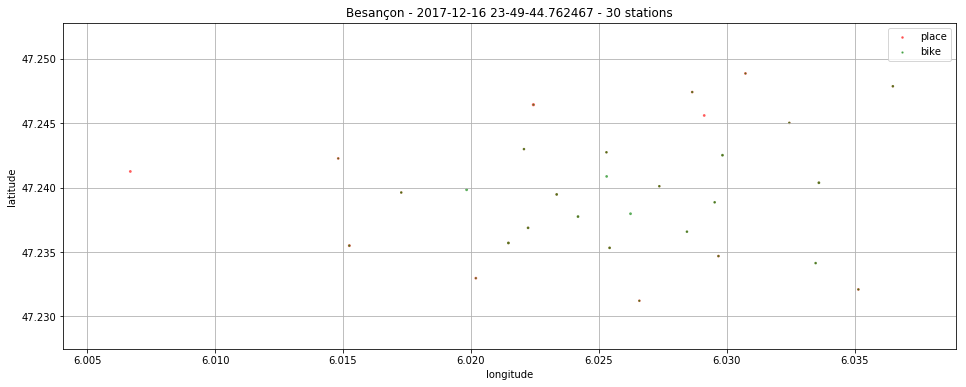

In [8]:
dt = df["file"][0]
subset = df [ df["file"] == dt ]
fig,ax,plt = DataVelibCollect.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","") \
                    .replace(".txt","").replace("_", " "), len(subset)))

On crée une petite animation avec les données velib :

In [9]:
import matplotlib.animation as animation
anim = DataVelibCollect.animation(df, interval = 100, figsize=(16,6))

In [10]:
from IPython.display import HTML

Ce qui suit ne fonctionne pas trop dans un notebook.

In [11]:
HTML(anim.to_jshtml())

On essaye autrement.

In [12]:
anim = DataVelibCollect.animation(df[-1000:], interval = 100, figsize=(16,6), module="moviepy")
anim.write_gif("anim1.gif", fps=20);


[MoviePy] Building file anim1.gif with imageio


 46%|██████████████████████████████████████                                            | 19/41 [00:03<00:04,  5.24it/s]WARNING:py.warnings:c:\Python363_x64\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)

 98%|████████████████████████████████████████████████████████████████████████████████  | 40/41 [00:08<00:00,  4.90it/s]


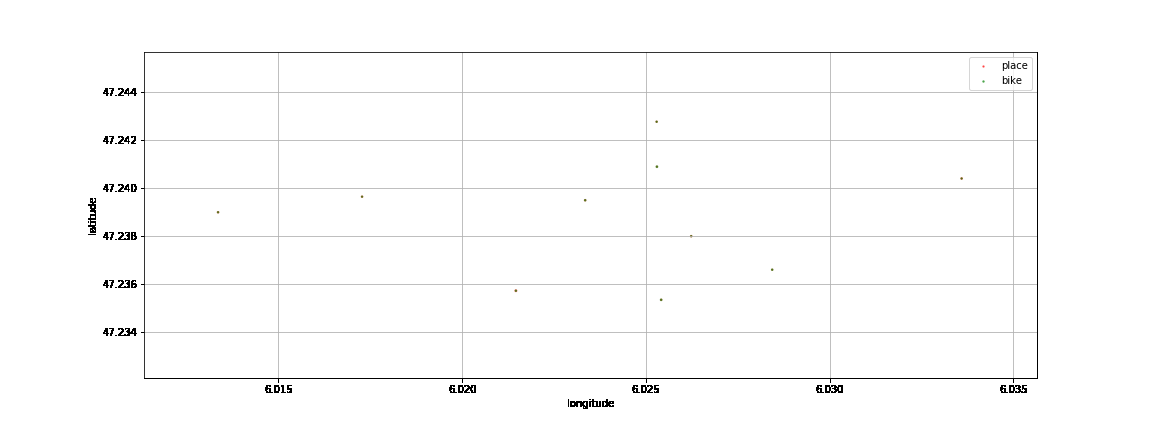

In [13]:
from IPython.display import Image
Image('anim1.gif')

Ca ne bouge pas trop. Sur cinq minutes, c'est plutôt attendu. On essaye sur plus de données.

In [14]:
from pyensae import download_data
from pyensae.datasource import DataVelibCollect
import pandas
download_data('besancon.df.txt.zip', website = 'xdtd')  

['besancon.df.txt']

In [15]:
df = pandas.read_csv("besancon.df.txt", sep="\t", encoding="utf8")
df.shape

(22650, 15)

In [16]:
anim = DataVelibCollect.animation(df[-1000:], interval = 100, figsize=(16,6), module="moviepy")
anim.write_gif("anim1.gif", fps=20);

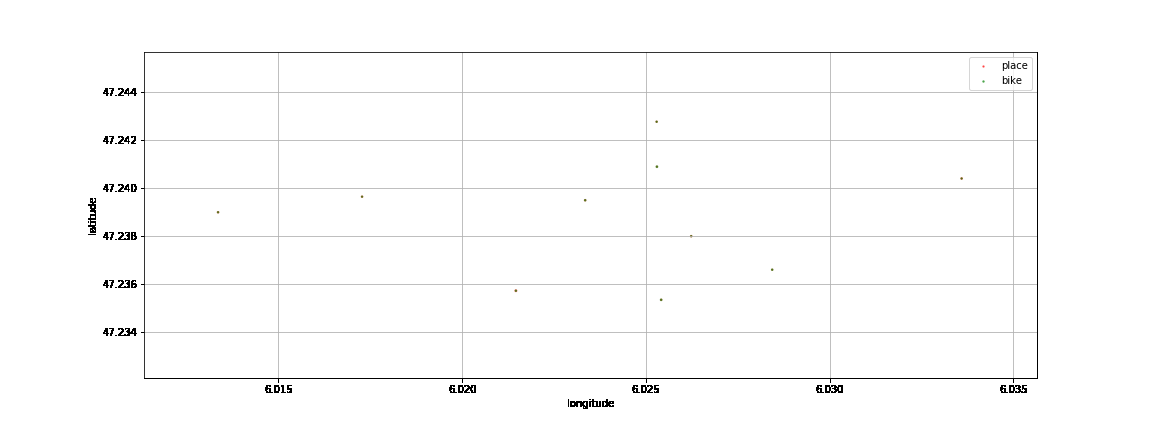

In [17]:
Image('anim1.gif')

Text(0.5,1,'Besançon - velib data.2014-05-22 02-40-02.681782 - 30 stations')

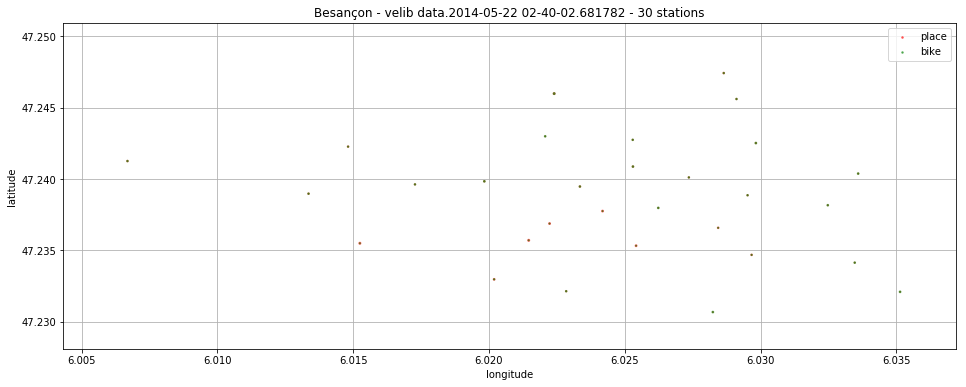

In [18]:
# première image des données
dt = df["file"][0]
subset = df [ df["file"] == dt ]
fig,ax,plt = DataVelibCollect.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","") \
                .replace(".txt","").replace("_", " "), len(subset)))

Text(0.5,1,'Besançon - velib data.2014-05-22 15-14-04.465855 - 30 stations')

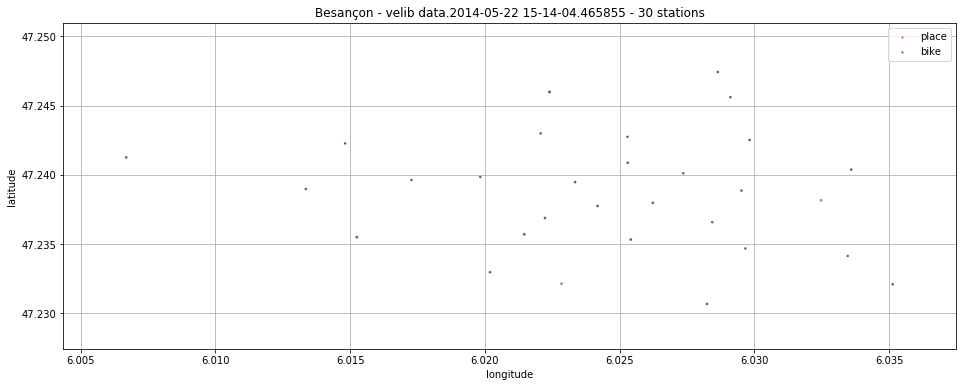

In [19]:
# dernière image
dt = df["file"][len(df)-1]
subset = df [ df["file"] == dt ]
fig,ax,plt = DataVelibCollect.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","") \
                            .replace(".txt","").replace("_", " "), len(subset)))

Vous trouverez un exemple d'utilisation de ces données ici [Coding Party 22 mai 2014 : inférer des trajectoires de vélos](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/coding_party_1.html) et là [Déterminer la vitesse moyenne des vélib](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/expose_velib.html).

In [20]:
DataVelibCollect.draw(subset, use_folium=True, size=0.1)